Domain – Health Care
focus – Cancer detection
Business challenge/requirement
John Cancer Hospital (JCH) is a leading cancer hospital in USA. It specializes in preventing breast cancer.
Over the period of the last few years, JCH has collected breast cancer data from patients who came for screening/treatment.
However, this data has almost 30 attributes and is difficult to run and interpret the result. You as ML expert has to reduce the no. of attributes (Dimensionality Reduction) so that results are meaningful and accurate.
Key issues
Reduce the no. of attributes/features in data to make the results and analysis comprehensible by doctors
Considerations
NONE
Data volume
- Approx 569 records – file breast-cancer-data.csv
Fields in Data
• Details in Module8-Dimensionality-Reduction-PCA.ipynb notebook
Additional information
- NA
Business benefits
Improved success rate of cancer detection and hence direct impact on revenue and profit of hospital. More than that it contributes to JCH's mission "Better Life"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
breastcancerdata = pd.read_csv('breast-cancer-data.csv')

In [5]:
breastcancerdata.shape

(569, 32)

In [6]:
breastcancerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
breastcancerdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


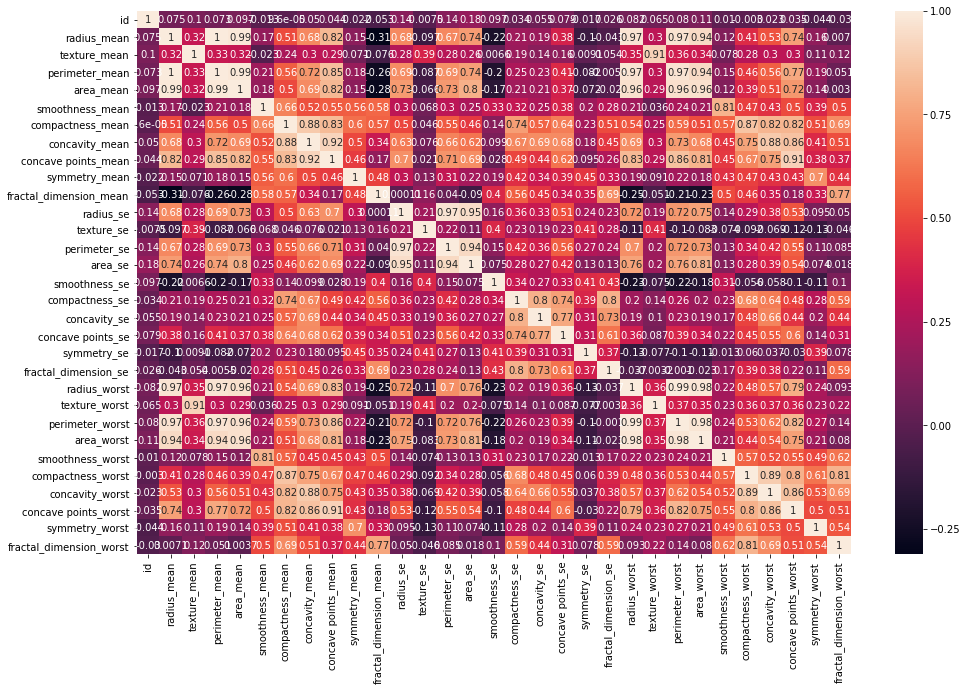

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(breastcancerdata.corr(),annot=True)

In [11]:
breastcancerdata.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder()

In [18]:
breastcancerdata['diagnosis'] = encoder.fit_transform(breastcancerdata['diagnosis'].astype('str'))

In [19]:
breastcancerdata.diagnosis.unique()

array([1, 0], dtype=int64)

In [20]:
X = breastcancerdata.drop('diagnosis',axis=1)

In [21]:
y = breastcancerdata.diagnosis

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5, test_size=0.2)

In [60]:
logreg= LogisticRegression(random_state=5)

In [61]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
lrprediction = logreg.predict(X_test)

In [63]:
accuracy_score(y_test, lrprediction)

0.9736842105263158

In [64]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=5)

In [80]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
pca.explained_variance_ratio_*100

array([9.82044672e+01, 1.61764899e+00, 1.55751075e-01, 1.20931964e-02,
       8.82724536e-03])

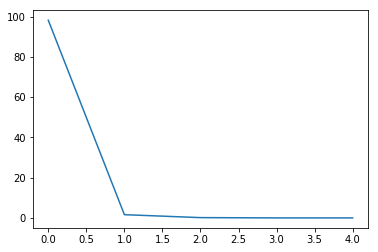

In [82]:
plt.plot(pca.explained_variance_ratio_*100)

In [83]:
dftransformedX = pd.DataFrame(pca.transform(X))

In [84]:
dftransformedX.sample(5)

,0,1,2,3,4
378,-231.153056,52.562963,-16.551210,3.780275,5.053093
445,-425.633512,7.489609,2.614366,-4.816939,-7.453741
273,-640.723401,-39.891495,13.190859,8.302178,-2.320106
267,-236.592219,33.418779,-1.112880,-6.002433,-3.185771
45,807.564573,4.271380,-14.041906,3.022220,7.928842


In [85]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dftransformedX, y, test_size=0.2)

In [86]:
logreg.fit(X_train1,y_train1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
predictionafterpca = logreg.predict(X_test1)

In [88]:
accuracy_score(y_test1, predictionafterpca)

0.9649122807017544

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test1, predictionafterpca)

array([[67,  0],
       [ 4, 43]], dtype=int64)

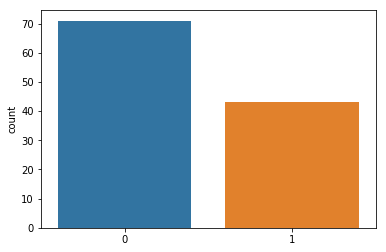

In [91]:
sns.countplot(predictionafterpca)

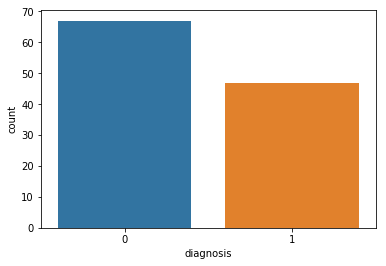

In [92]:
sns.countplot(y_test1)